In [621]:
# layer in neural network they are 3 layer in this
# input data
# Hidden Layer
# Output Layer

In [622]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
#import importlib as plt # Remove or comment out this line, it overwrites the intended plt alias
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.optim as optim

In [623]:
class Model(nn.Module):
  def __init__(self,in_feature = 4 ,h1 = 7,h2 = 7 ,Output_feature = 3 ):
    super().__init__()

    self.fc1 = nn.Linear(in_feature,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc4 = nn.Linear(h2,Output_feature)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc4(x)

    return x

In [624]:
torch.manual_seed(70)

model = Model()

In [625]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

my_df = pd.read_csv(url)


In [626]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [627]:
my_df ['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df ['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df ['variety'] = my_df['variety'].replace('Virginica',2.0)


my_df

<ipython-input-627-7a400b04a4d1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df ['variety'] = my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [628]:
X = my_df.drop('variety',axis = 1)
y = my_df['variety']

In [629]:
X = X.values
y = y.values

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [631]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [632]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [633]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 00.1)

In [634]:

epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch {i} adn losses {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 adn losses 1.1463943719863892
Epoch 10 adn losses 1.1118628978729248
Epoch 20 adn losses 1.0482689142227173
Epoch 30 adn losses 1.030933141708374
Epoch 40 adn losses 0.9288156628608704
Epoch 50 adn losses 0.8074404001235962
Epoch 60 adn losses 0.6536977887153625
Epoch 70 adn losses 0.5264948606491089
Epoch 80 adn losses 0.4396953582763672
Epoch 90 adn losses 0.36189091205596924


Text(0.5, 0, 'Epochs')

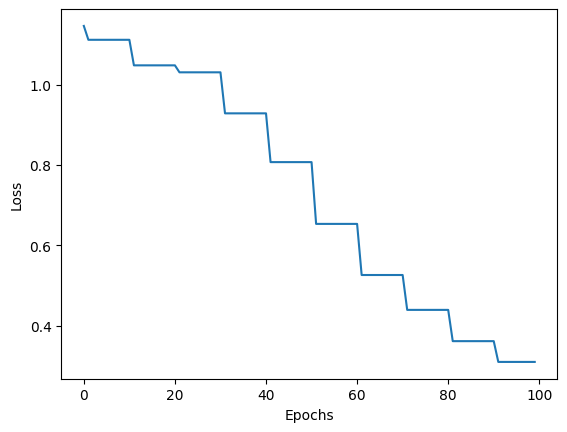

In [635]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [636]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss   = criterion(y_eval,y_test)

In [637]:
y_eval

tensor([[-5.4958,  2.2565,  3.0246],
        [-6.3183,  2.5427,  3.5394],
        [-7.0930,  2.7598,  3.8899],
        [-3.6112,  1.3831,  1.1158],
        [-5.9193,  2.3263,  3.0536],
        [-2.7605,  0.9918,  0.2605],
        [-5.0042,  1.9760,  2.3615],
        [-3.1440,  1.1616,  0.6250],
        [-5.3197,  2.0871,  2.5691],
        [-6.5365,  2.5964,  3.6237],
        [-4.6056,  1.8140,  2.0299],
        [ 2.7375, -1.3951, -5.0226],
        [ 2.5400, -1.2271, -4.5527],
        [-2.0065,  0.7807, -0.0588],
        [ 2.2523, -1.1842, -4.4771],
        [-4.8315,  1.9220,  2.2701],
        [ 2.3647, -1.1834, -4.4536],
        [-5.1188,  2.0798,  2.6418],
        [ 2.8687, -1.4748, -5.2384],
        [ 1.9117, -0.9454, -3.8200],
        [-2.4949,  0.9555,  0.2710],
        [-6.2145,  2.4381,  3.2726],
        [ 2.4352, -1.2696, -4.7005],
        [ 2.7041, -1.3452, -4.8783],
        [-1.9950,  0.6891, -0.3494],
        [-3.2316,  1.2437,  0.8481],
        [-3.5917,  1.3375,  0.9779],
 

In [638]:
corret = 0

with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x ="sentos"
    elif y_test[i] == 1:
      x = "versicolor"
    elif y_test[i] == 2:
      x = "virginica"


    print(f'{i + 1}.) {str(y_val)} \t {x} \t {y_val.argmax().item() == y_test[i]}')

    if y_val.argmax().item() == y_test[i] :
      corret += 1

print(f'we goat {corret} correct out of ',len(y_test))

1.) tensor([-5.4958,  2.2565,  3.0246]) 	 virginica 	 True
2.) tensor([-6.3183,  2.5427,  3.5394]) 	 virginica 	 True
3.) tensor([-7.0930,  2.7598,  3.8899]) 	 virginica 	 True
4.) tensor([-3.6112,  1.3831,  1.1158]) 	 versicolor 	 True
5.) tensor([-5.9193,  2.3263,  3.0536]) 	 virginica 	 True
6.) tensor([-2.7605,  0.9918,  0.2605]) 	 versicolor 	 True
7.) tensor([-5.0042,  1.9760,  2.3615]) 	 virginica 	 True
8.) tensor([-3.1440,  1.1616,  0.6250]) 	 versicolor 	 True
9.) tensor([-5.3197,  2.0871,  2.5691]) 	 virginica 	 True
10.) tensor([-6.5365,  2.5964,  3.6237]) 	 virginica 	 True
11.) tensor([-4.6056,  1.8140,  2.0299]) 	 virginica 	 True
12.) tensor([ 2.7375, -1.3951, -5.0226]) 	 sentos 	 True
13.) tensor([ 2.5400, -1.2271, -4.5527]) 	 sentos 	 True
14.) tensor([-2.0065,  0.7807, -0.0588]) 	 versicolor 	 True
15.) tensor([ 2.2523, -1.1842, -4.4771]) 	 sentos 	 True
16.) tensor([-4.8315,  1.9220,  2.2701]) 	 virginica 	 True
17.) tensor([ 2.3647, -1.1834, -4.4536]) 	 sentos 	 Tr

In [639]:
new_data = torch.tensor([4.7,3.2,1.3,0.2])

In [643]:
# with torch.no_grad():
#   for i,data in enumerate(new_data):
#     y_val = model.forward(new_data)

#     if y_test[i] == 0:
#       x ="sentos"
#     elif y_test[i] == 1:
#       x = "versicolor"
#     elif y_test[i] == 2:
#       x = "virginica"


#     print(f'{i + 1}.) {str(y_val)} \t {x} \t {y_val.argmax().item() == y_test[i]}')

#     if y_val.argmax().item() == y_test[i] :
#       corret += 1

# print(f'we goat {corret} correct out of ',len(y_test))

1.) tensor([ 2.7041, -1.3452, -4.8783]) 	 virginica 	 False
2.) tensor([ 2.7041, -1.3452, -4.8783]) 	 virginica 	 False
3.) tensor([ 2.7041, -1.3452, -4.8783]) 	 virginica 	 False
4.) tensor([ 2.7041, -1.3452, -4.8783]) 	 versicolor 	 False
we goat 29 correct out of  30


In [650]:
# save our nn model

torch.save(model.state_dict(),'simple_Neural_NN.pt')

new_model = Model()

new_model.load_state_dict(torch.load("simple_Neural_NN.pt"))

<All keys matched successfully>

In [651]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=7, bias=True)
  (fc4): Linear(in_features=7, out_features=3, bias=True)
)